# Capstone Project - Packaging free supermarket in NYC

## Table of contents

1. Introduction 
2. Data Requirements
3. Methodology 
4. Analysis
5. Results
6. Discussion 
7. Conclusion 

## Introduction

### Business Problem & Background

There exist a huge plastic waste pile that grows every day, and primarily consists of single-use plastics. One of the main contributors to this problem is the food sector due to grocery packaging. Therefore, there is need for circular grocery shopping with recycable packaging in grocery stores.

Jarly, a circular, packaging-free grocery store is exploring the opportunity to open a venture in Manhatten, Brooklyn or Queens, New York. Those are the urban core of the New York metropolitan area, and the most densely populated of the five boroughs of New York City. It has been described as the cultural, financial, media and entertainment capital of the world. Outdoor dining used to be in the culture of the city, but COVID_19 has changed that. People tend to do more home-cooking nowadays and seek high-quality food which does not do harm to the environment. I will therefore provide an analytical view that will support decision making for the optimal supermarket location, considering the viable options discovered, and based on specific data and criteria discussed below. 

## Data Section 

**1. New York City:**
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 
This dataset exists for free on the web. Link to the dataset is: https://geo.nyu.edu/catalog/nyu_2451_34572

**2. Supermarkets & Farmers Markets**
Foursquare API, which allows application developers to interact with the Foursquare Platform, will be used for finding supermarkets and farmers markets. Foursqueare is a social location service that allows users to explore the world around them. The API itself is a RESTful set of addresses to which you can send request and get responses. The API allows querying places and users, exploring popular places and checking out reviews and photographs of these places. New York City geographical coordinates data will be used as input for the Foursquare API, that will be leveraged to provision information on venues for each neighborhood in NYC.

To gather information of farmers markets and add this to the supermarket data frame, we will use:https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2 and https://www.grownyc.org/greenmarketco/foodbox. A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods. 

After obtaining the neighborhoods data of New york City and the the supermarkets and farmers markets in each neighborhood using Foursquare API, data science techniques can be applied. One hot encoding will be used on the obtained dataset to find the 10 most common supermarkets in each neighborhood. The returned venues, are than clustered using k-means clustering. The optimal number of clusters can be obtained using silhouette score. The obtained clusters can be analyzed to find the major type of supermarket / food market in each cluster. Folium visualization library can be used to visualize the clusters superimposed on the map of New York City.


**3. Population**

For extra analysis on the population/geographics, the data from the following wikipedia can be used:

* New York Population: https://en.wikipedia.org/wiki/New_York_City
* New York City Demographics: https://en.wikipedia.org/wiki/Economy_of_New_York_City, https://en.wikipedia.org/wiki/Portal:New_York_City






### Import libraries

In [175]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### 1. Download and Explore Dataset
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 


In [176]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import urllib.request
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Libraries imported.


Load data and look at it 

In [177]:

with open('C:\\Users\\Elisabeth\\Downloads\\nyu-2451-34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

#### 2. Transform data into pandas dataframe


In [178]:
neighborhoods_data = newyork_data['features']
#define columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

#instantiate the dataframe
neighborhoods = pd.DataFrame(columns = column_names)

#Loop through the data and fill the dataframe one row at a time
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [179]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


Use geopy library to get the latitude and longitude of values of New York City 

In [180]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [181]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Create a map of New York with neighborhoods superimposed on top.


In [182]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### Borough Analysis

We decide to look at the 3 most suitable Boroughs, Manhattan, Brooklyn and Queens. 
We will: 
1. Create a map of each borough and add markers
2. Analyze each neighborhood in each borough via one hot encoding
3. Find supermarkets, organic markets, farmers markets, health food stores, convenience stores, deli/bodega's, fruit & vegetable stores, cheese shops, dairy stores, fish markets, butchers, and markets in all neighborhoods. 
4. Merge all data of three boroughs into one dataframe

#### Manhattan neighborhoods

In [183]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


#### Brooklyn neighborhoods

In [184]:
brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


#### Queens neighborhoods

In [185]:
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


We have now the data of the 3 Boroughs we are interested in. We will look into the specific dataframes now. 

We visualize the boroughs

In [186]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Define information of interest and filter the dataframe

In [187]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


##### Define Foursquare Credentials and Version 
We use foursquare API to explore the neighborhoods and segment them 

In [188]:
CLIENT_ID = 'PZ1LC5SZPGCD2AL4FJKSO13D4AVFP4AV1YSC5FDJKJMH0M2B' # your Foursquare ID
CLIENT_SECRET = 'DHYY352X4QZQONVMXH2A5PWS42ATSANTO5SJAA0SDP2C3RAW' # your Foursquare Secret
ACCESS_TOKEN = '2ZF1RBPFGARM4ZWPRPR3UMHCF20BLS3YYYKTITZBUK3YVD05' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
NEAR = 'Chicago, Il'


In [189]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


##### Explore neighborhoods in Manhattan
We create a function to repeat the same process to all the neighborhoods in Manhatten 

In [190]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


Check the number of returned venues for each neighborhood

In [191]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,75,75,75,75,75,75
Carnegie Hill,90,90,90,90,90,90
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,39,39,39,39,39,39
East Village,100,100,100,100,100,100


In [192]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3179, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


#### Find venues of interest

In [194]:
manhattan_food_venues = manhattan_venues.loc[manhattan_venues['Venue Category'].isin(['Supermarket',"Organic Grocery","Farmers Market", 
                                                                                      "Health Food Store","Fruit & Vegetable Store", 
                                                                                      'Convenience Store', 'Deli / Bodega', 'Food & Drink Shop', 
                                                                                      'Butcher', 'Cheese Shop', 'Dairy Store', 'Fish Market', 'Market'])].reset_index(drop=True)
print(manhattan_food_venues.shape)
manhattan_food_venues.head()

(86, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Terrace View Delicatessen,40.875995,-73.913151,Deli / Bodega
1,Chinatown,40.715618,-73.994279,Hong Kong Supermarket 香港超級市場,40.717596,-73.996173,Supermarket
2,Chinatown,40.715618,-73.994279,Dimes Deli,40.714592,-73.990817,Organic Grocery
3,Washington Heights,40.851903,-73.936900,Jin's Superette,40.850989,-73.938514,Deli / Bodega
4,Washington Heights,40.851903,-73.936900,Qmart,40.851999,-73.934915,Market


#### Repeat process for Brooklyn 

In [195]:
address_b = 'Brooklyn, NY'

geolocator_b = Nominatim(user_agent="ny_explorer")
location_b = geolocator_b.geocode(address_b)
latitude_b = location_b.latitude
longitude_b = location_b.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude_b, longitude_b))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [196]:
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [197]:
brooklyn_food_venues = brooklyn_venues.loc[brooklyn_venues['Venue Category'].isin(['Supermarket',"Organic Grocery","Farmers Market", 
                                                                                      "Health Food Store","Fruit & Vegetable Store", 
                                                                                      'Convenience Store', 'Deli / Bodega', 'Food & Drink Shop', 
                                                                                      'Butcher', 'Cheese Shop', 'Dairy Store', 'Fish Market', 'Market'])].reset_index(drop=True)
print(brooklyn_food_venues.shape)
brooklyn_food_venues.head(20)

(127, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Key Food Fresh & Natural,40.628204,-74.029461,Supermarket
1,Bensonhurst,40.611009,-73.995180,Frank And Sal's Prime Meats,40.610232,-73.999227,Butcher
2,Sunset Park,40.645103,-74.010316,Vanessa Mini Market & Deli,40.646267,-74.004894,Deli / Bodega
3,Greenpoint,40.730201,-73.954241,God Bless USA Deli,40.728267,-73.953384,Deli / Bodega
4,Greenpoint,40.730201,-73.954241,Mom and Pop's Organic Market,40.730000,-73.954178,Market
5,Greenpoint,40.730201,-73.954241,Edy’s Grocer,40.727486,-73.951056,Deli / Bodega
6,Greenpoint,40.730201,-73.954241,Mr. Berry,40.729990,-73.954139,Fruit & Vegetable Store
7,Greenpoint,40.730201,-73.954241,Franklin Corner Cafe,40.732805,-73.958081,Deli / Bodega
8,Greenpoint,40.730201,-73.954241,Greenpoint Natural Market,40.733807,-73.954916,Organic Grocery
9,Gravesend,40.595260,-73.973471,Willy Farm Fruit & Vegetable,40.596521,-73.975548,Farmers Market


#### Repeat process for Queens

In [198]:
address_q = 'Queens, NY'

geolocator_q = Nominatim(user_agent="ny_explorer")
location_q = geolocator_q.geocode(address_q)
latitude_q = location_q.latitude
longitude_q = location_q.longitude
print('The geograpical coordinate of Queens are {}, {}.'.format(latitude_q, longitude_q))
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                                   latitudes=queens_data['Latitude'],
                                   longitudes=queens_data['Longitude']
                                  )
queens_food_venues = queens_venues.loc[queens_venues['Venue Category'].isin(['Supermarket',"Organic Grocery","Farmers Market", 
                                                                                      "Health Food Store","Fruit & Vegetable Store", 
                                                                                      'Convenience Store', 'Deli / Bodega', 'Food & Drink Shop', 
                                                                                      'Butcher', 'Cheese Shop', 'Dairy Store', 'Fish Market', 'Market'])].reset_index(drop=True)
print(queens_food_venues.shape)
queens_food_venues.head(20)

The geograpical coordinate of Queens are 40.7498243, -73.7976337.
Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hamm

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Mediterranean Foods,40.765579,-73.919123,Food & Drink Shop
1,Astoria,40.768509,-73.915654,Elliniki Agora,40.766339,-73.920145,Food & Drink Shop
2,Astoria,40.768509,-73.915654,Dave and Tony's Salumeria,40.765851,-73.918309,Deli / Bodega
3,Astoria,40.768509,-73.915654,Smart Choice Convenience Store,40.765585,-73.918622,Deli / Bodega
4,Astoria,40.768509,-73.915654,Nile Deli,40.767527,-73.912087,Deli / Bodega
5,Woodside,40.746349,-73.901842,3 Aunties Thai Market,40.746322,-73.899676,Market
6,Woodside,40.746349,-73.901842,Dollar & Up Fruits & Vegetables,40.745840,-73.902393,Fruit & Vegetable Store
7,Woodside,40.746349,-73.901842,7-Eleven,40.745536,-73.905241,Convenience Store
8,Woodside,40.746349,-73.901842,Stop & Deli,40.743754,-73.900376,Deli / Bodega
9,Jackson Heights,40.751981,-73.882821,Stand Alone Cheese,40.749601,-73.886882,Cheese Shop


In [199]:
# create map of Manhatten using latitude and longitude values
map_manhattan_food = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_food_venues['Neighborhood Latitude'], manhattan_food_venues['Neighborhood Longitude'], manhattan_food_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_food)  
    
map_manhattan_food

### 3. Analyze each neighborhood
Next, we group rows by neighborhood and take the mean of the frequency of occurence of each category. We do this for all boroughs. 

In [200]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_food_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_food_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Health Food Store,Market,Organic Grocery,Supermarket
0,Marble Hill,0,0,0,1,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,0,1
2,Chinatown,0,0,0,0,0,0,0,0,0,1,0
3,Washington Heights,0,0,0,1,0,0,0,0,0,0,0
4,Washington Heights,0,0,0,0,0,0,0,0,1,0,0


In [201]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_food_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_food_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

,Neighborhood,Butcher,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Organic Grocery,Supermarket
0,Bay Ridge,0,0,0,0,0,0,0,0,0,0,1
1,Bensonhurst,1,0,0,0,0,0,0,0,0,0,0
2,Sunset Park,0,0,1,0,0,0,0,0,0,0,0
3,Greenpoint,0,0,1,0,0,0,0,0,0,0,0
4,Greenpoint,0,0,0,0,0,0,0,0,1,0,0


In [202]:
# one hot encoding
queens_onehot = pd.get_dummies(queens_food_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehot['Neighborhood'] = queens_food_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [queens_onehot.columns[-1]] + list(queens_onehot.columns[:-1])
queens_onehot = queens_onehot[fixed_columns]

queens_onehot.head()

,Neighborhood,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Organic Grocery,Supermarket
0,Astoria,0,0,0,0,0,0,1,0,0,0,0,0
1,Astoria,0,0,0,0,0,0,1,0,0,0,0,0
2,Astoria,0,0,0,1,0,0,0,0,0,0,0,0
3,Astoria,0,0,0,1,0,0,0,0,0,0,0,0
4,Astoria,0,0,0,1,0,0,0,0,0,0,0,0


In [203]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Health Food Store,Market,Organic Grocery,Supermarket
0,Battery Park City,0.000000,0.000000,1.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000
1,Carnegie Hill,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,1.000000
2,Chelsea,0.200000,0.200000,0.00,0.000000,0.000000,0.2,0.000000,0.000000,0.400000,0.00,0.000000
3,Chinatown,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.50,0.500000
4,Civic Center,0.000000,0.000000,0.00,0.500000,0.500000,0.0,0.000000,0.000000,0.000000,0.00,0.000000
5,Clinton,0.000000,0.000000,0.00,0.250000,0.000000,0.0,0.000000,0.250000,0.000000,0.25,0.250000
6,East Harlem,0.000000,0.000000,0.00,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000
7,East Village,0.000000,0.250000,0.00,0.250000,0.250000,0.0,0.000000,0.000000,0.000000,0.25,0.000000
8,Financial District,0.000000,0.000000,0.50,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000
9,Flatiron,0.000000,0.500000,0.00,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.00,0.000000


In [204]:
brooklyn_grouped = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_grouped



,Neighborhood,Butcher,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Organic Grocery,Supermarket
0,Bay Ridge,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,Bedford Stuyvesant,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bensonhurst,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Boerum Hill,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Borough Park,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Brighton Beach,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
6,Brooklyn Heights,0.000000,0.000000,0.833333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Brownsville,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bushwick,0.000000,0.000000,0.750000,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000
9,Canarsie,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [205]:
queens_grouped = queens_onehot.groupby('Neighborhood').mean().reset_index()
queens_grouped

,Neighborhood,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Organic Grocery,Supermarket
0,Astoria,0.000000,0.000,0.000000,0.600000,0.000000,0.0,0.4,0.00,0.000000,0.000,0.0,0.000000
1,Astoria Heights,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,1.000000
2,Auburndale,0.000000,0.000,0.000000,0.500000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.500000
3,Bay Terrace,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,1.000000
4,Bayside,0.000000,0.000,0.000000,0.000000,1.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.000000
5,Beechhurst,0.000000,0.000,0.333333,0.333333,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.333333
6,Bellaire,0.000000,0.000,0.333333,0.333333,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.333333
7,Belle Harbor,0.000000,0.000,0.000000,1.000000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.000000
8,Bellerose,0.000000,0.000,0.000000,1.000000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.000000
9,Blissville,0.000000,0.000,0.000000,1.000000,0.000000,0.0,0.0,0.00,0.000000,0.000,0.0,0.000000


In [206]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
               venue  freq
0  Convenience Store   1.0
1            Butcher   0.0
2        Cheese Shop   0.0
3      Deli / Bodega   0.0
4     Farmers Market   0.0


----Carnegie Hill----
               venue  freq
0        Supermarket   1.0
1            Butcher   0.0
2        Cheese Shop   0.0
3  Convenience Store   0.0
4      Deli / Bodega   0.0


----Chelsea----
               venue  freq
0             Market   0.4
1            Butcher   0.2
2        Cheese Shop   0.2
3        Fish Market   0.2
4  Convenience Store   0.0


----Chinatown----
               venue  freq
0    Organic Grocery   0.5
1        Supermarket   0.5
2            Butcher   0.0
3        Cheese Shop   0.0
4  Convenience Store   0.0


----Civic Center----
               venue  freq
0      Deli / Bodega   0.5
1     Farmers Market   0.5
2            Butcher   0.0
3        Cheese Shop   0.0
4  Convenience Store   0.0


----Clinton----
               venue  freq
0      Deli / Bodega  0.25
1  Heal

We find the most common venues in three Boroughs

In [207]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [208]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_manhattan = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_manhattan['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted_manhattan.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_manhattan.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Battery Park City,Convenience Store,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
1,Carnegie Hill,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market,Farmers Market
2,Chelsea,Market,Fish Market,Cheese Shop,Butcher,Supermarket,Organic Grocery,Health Food Store
3,Chinatown,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market,Farmers Market
4,Civic Center,Farmers Market,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop


In [209]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_brooklyn = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_brooklyn['Neighborhood'] = brooklyn_grouped['Neighborhood']

for ind in np.arange(brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted_brooklyn.iloc[ind, 1:] = return_most_common_venues(brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_brooklyn.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Bay Ridge,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop,Fish Market
1,Bedford Stuyvesant,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
2,Bensonhurst,Butcher,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
3,Boerum Hill,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
4,Borough Park,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop


In [210]:
num_top_venues = 7

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_queens = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_queens['Neighborhood'] = queens_grouped['Neighborhood']

for ind in np.arange(queens_grouped.shape[0]):
    neighborhoods_venues_sorted_queens.iloc[ind, 1:] = return_most_common_venues(queens_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_queens.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Astoria,Deli / Bodega,Food & Drink Shop,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store
1,Astoria Heights,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop,Fish Market
2,Auburndale,Supermarket,Deli / Bodega,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
3,Bay Terrace,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop,Fish Market
4,Bayside,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop


### Merge dataframes of Manhattan, Brooklyn and Queens

In [211]:
neighborhoofd_venues_sorted_mbq_merged = [neighborhoods_venues_sorted_manhattan, neighborhoods_venues_sorted_brooklyn, neighborhoods_venues_sorted_queens]
neighborhoofd_venues_sorted_mbq = pd.concat(neighborhoofd_venues_sorted_mbq_merged)
neighborhoofd_venues_sorted_mbq.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Battery Park City,Convenience Store,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
1,Carnegie Hill,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market,Farmers Market
2,Chelsea,Market,Fish Market,Cheese Shop,Butcher,Supermarket,Organic Grocery,Health Food Store
3,Chinatown,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market,Farmers Market
4,Civic Center,Farmers Market,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop


In [212]:

'sort=False'

'sort=False'

In [213]:
neighborhoofd_venues_sorted_mbq_merged_grouped = [manhattan_grouped, brooklyn_grouped, queens_grouped]
neighborhoofd_venues_sorted_mbq_grouped = pd.concat(neighborhoofd_venues_sorted_mbq_merged_grouped )
neighborhoofd_venues_sorted_mbq_grouped.head(100)

C:\Users\Elisabeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Neighborhood,Organic Grocery,Supermarket
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,Battery Park City,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,Carnegie Hill,0.000000,1.000000
2,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,NaN,0.000000,0.400000,Chelsea,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,Chinatown,0.500000,0.500000
4,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.000000,0.000000,Civic Center,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,NaN,0.250000,0.000000,Clinton,0.250000,0.250000
6,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,East Harlem,0.000000,0.000000
7,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,NaN,0.000000,0.000000,East Village,0.250000,0.000000
8,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,Financial District,0.000000,0.000000
9,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.000000,0.000000,Flatiron,0.000000,0.000000


In [214]:
neighborhoofd_venues_sorted_mbq_grouped_1 = neighborhoofd_venues_sorted_mbq_grouped.fillna(0) 
neighborhoofd_venues_sorted_mbq_grouped_1.head(100)

,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Neighborhood,Organic Grocery,Supermarket
0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Battery Park City,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Carnegie Hill,0.000000,1.000000
2,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.400000,Chelsea,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chinatown,0.500000,0.500000
4,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,Civic Center,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,Clinton,0.250000,0.250000
6,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,East Harlem,0.000000,0.000000
7,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,East Village,0.250000,0.000000
8,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Financial District,0.000000,0.000000
9,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,Flatiron,0.000000,0.000000


In [215]:
food_venues_merged = [manhattan_food_venues, brooklyn_food_venues, queens_food_venues]
food_venues_merged_mbq = pd.concat(food_venues_merged)
food_venues_merged_mbq.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.910660,Terrace View Delicatessen,40.875995,-73.913151,Deli / Bodega
1,Chinatown,40.715618,-73.994279,Hong Kong Supermarket 香港超級市場,40.717596,-73.996173,Supermarket
2,Chinatown,40.715618,-73.994279,Dimes Deli,40.714592,-73.990817,Organic Grocery
3,Washington Heights,40.851903,-73.936900,Jin's Superette,40.850989,-73.938514,Deli / Bodega
4,Washington Heights,40.851903,-73.936900,Qmart,40.851999,-73.934915,Market


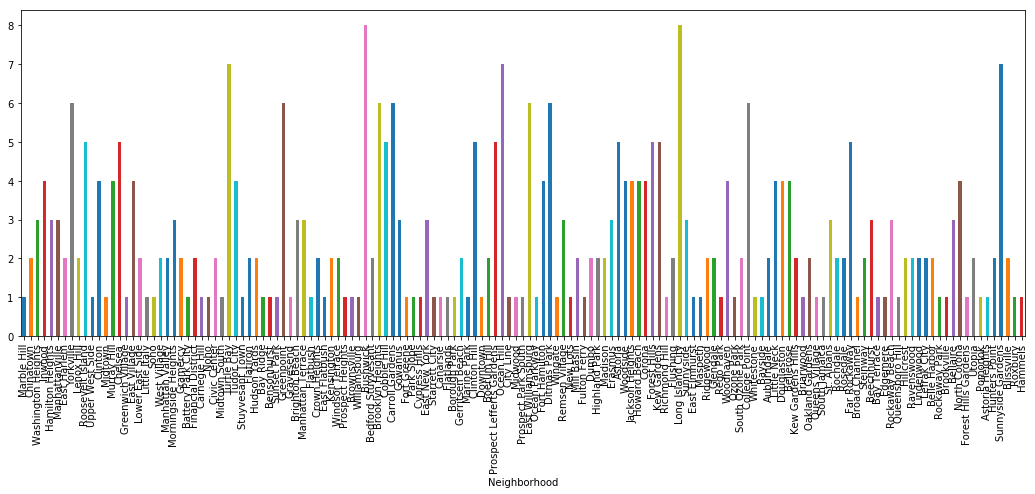

In [216]:
df = food_venues_merged_mbq.groupby(['Neighborhood'], sort=False)['Venue'].count()
df.plot.bar(figsize=(18,6))

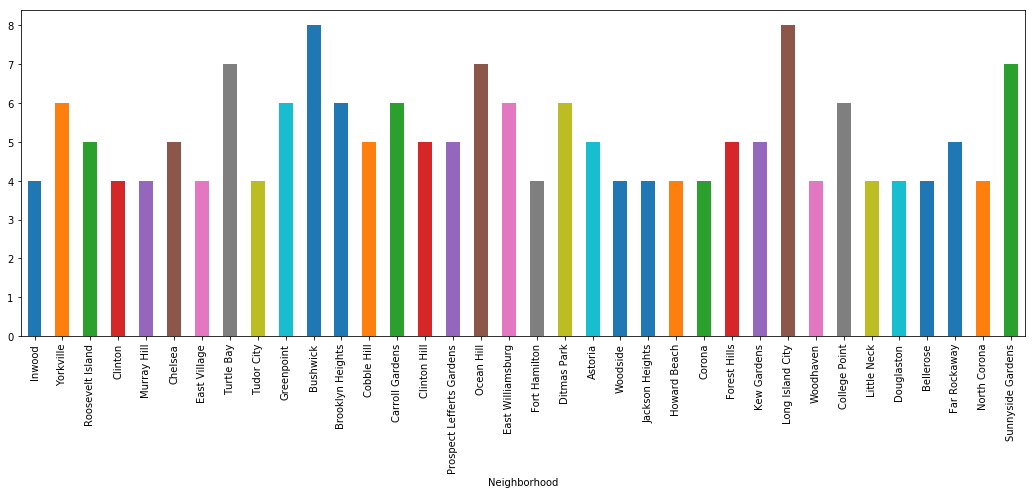

In [217]:
df = df[df >= 4]
df.plot.bar(figsize=(18,6))

### Cluster the neighborhoods
We run k-means to cluster the neighborhood into 5 clusters
Then we create a new data frame that includes the cluster, as well as the top venues for each neighborhood. 
Finally we visualize the clusters

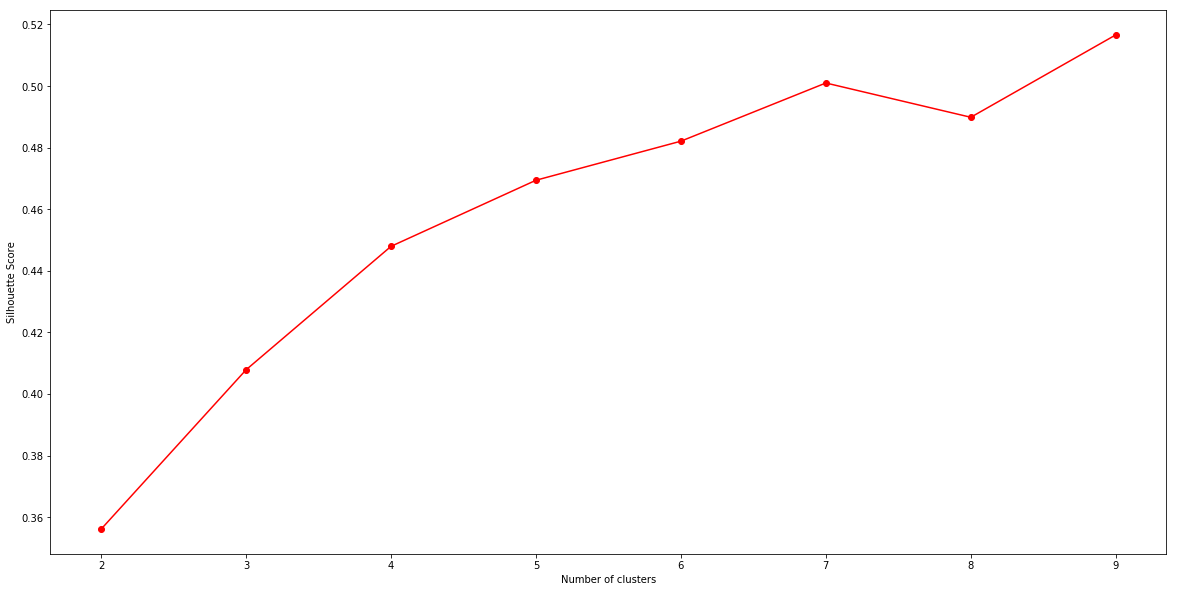

In [233]:
from sklearn.metrics import silhouette_samples, silhouette_score
neighborhood_venues_sorted_mbq_grouped_clustering = neighborhoofd_venues_sorted_mbq_grouped_1.drop(['Neighborhood'], axis=1)

max_score = 10
scores = []

for kclusters in range(2, max_score):
    # Run k-means clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(neighborhoofd_venues_sorted_mbq_grouped_clustering)
    
    # Gets the silhouette score
    score = silhouette_score(neighborhoofd_venues_sorted_mbq_grouped_clustering, kmeans)
    scores.append(score)

plt.figure(figsize=(20,10))
plt.plot(np.arange(2, max_score), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, max_score))
plt.show()

In [264]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(neighborhoofd_venues_sorted_mbq_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 3, 0, 0, 1, 0, 0, 2])

In [265]:
mbq_data = [manhattan_data, brooklyn_data, queens_data]
mbq_data_merged = pd.concat(mbq_data)

In [266]:
neighborhoofd_venues_sorted_mbq_grouped_1

,Cluster Labels,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Neighborhood,Organic Grocery,Supermarket
0,6,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Battery Park City,0.000000,0.000000
1,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Carnegie Hill,0.000000,1.000000
2,6,0.200000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.400000,Chelsea,0.000000,0.000000
3,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chinatown,0.500000,0.500000
4,0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,Civic Center,0.000000,0.000000
5,5,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,Clinton,0.250000,0.250000
6,1,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,East Harlem,0.000000,0.000000
7,5,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,East Village,0.250000,0.000000
8,0,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Financial District,0.000000,0.000000
9,2,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,Flatiron,0.000000,0.000000


In [284]:
if 'Cluster Labels' in neighborhoofd_venues_sorted_mbq_grouped_1:
    neighborhoofd_venues_sorted_mbq_grouped_1.drop(columns='Cluster Labels', inplace=True)
#neighborhoofd_venues_sorted_mbq_grouped_1.insert(0, 'Cluster Labels', kmeans.labels_)
if 'Cluster Labels' in neighborhoofd_venues_sorted_mbq:
    neighborhoofd_venues_sorted_mbq.drop(columns='Cluster Labels', inplace=True)
neighborhoofd_venues_sorted_mbq.insert(0, 'Cluster Labels', kmeans.labels_)

In [285]:
# add clustering labels

#neighborhoofd_venues_sorted_mbq_grouped_1.insert(0, 'Cluster Labels', kmeans.labels_)

mbq_merged_1 = mbq_data_merged

                           
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
mbq_merged_1 = mbq_merged_1.join(neighborhoofd_venues_sorted_mbq.set_index('Neighborhood'), on='Neighborhood')

mbq_merged_1.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1.0,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
1,Manhattan,Chinatown,40.715618,-73.994279,3.0,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market,Farmers Market
2,Manhattan,Washington Heights,40.851903,-73.936900,1.0,Deli / Bodega,Market,Supermarket,Organic Grocery,Health Food Store,Food & Drink Shop,Fish Market
3,Manhattan,Inwood,40.867684,-73.921210,0.0,Deli / Bodega,Supermarket,Farmers Market,Organic Grocery,Market,Health Food Store,Food & Drink Shop
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1.0,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market


In [276]:
mbq_merged_1.dropna()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Butcher,Cheese Shop,Convenience Store,Deli / Bodega,Farmers Market,Fish Market,Food & Drink Shop,Fruit & Vegetable Store,Health Food Store,Market,Organic Grocery,Supermarket
0,Manhattan,Marble Hill,40.876551,-73.910660,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Manhattan,Chinatown,40.715618,-73.994279,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
2,Manhattan,Washington Heights,40.851903,-73.936900,1.0,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
3,Manhattan,Inwood,40.867684,-73.921210,0.0,0.000000,0.000000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Manhattan,Manhattanville,40.816934,-73.957385,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333
7,Manhattan,East Harlem,40.792249,-73.944182,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Manhattan,Yorkville,40.775930,-73.947118,1.0,0.166667,0.000000,0.000000,0.666667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,Manhattan,Lenox Hill,40.768113,-73.958860,0.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
11,Manhattan,Roosevelt Island,40.762160,-73.949168,0.0,0.000000,0.000000,0.000000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000


In [286]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mbq_merged_1['Latitude'], mbq_merged_1['Longitude'], mbq_merged_1['Neighborhood'], mbq_merged_1['Cluster Labels']):
    print(cluster)
    if cluster == cluster:
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

1.0
3.0
1.0
0.0
1.0
0.0
nan
1.0
nan
1.0
0.0
0.0
0.0
nan
0.0
1.0
0.0
3.0
0.0
1.0
0.0
0.0
nan
3.0
3.0
3.0
2.0
0.0
0.0
0.0
0.0
3.0
1.0
0.0
0.0
nan
0.0
1.0
2.0
2.0
3.0
3.0
0.0
1.0
0.0
2.0
0.0
nan
0.0
1.0
0.0
3.0
0.0
0.0
0.0
2.0
1.0
1.0
1.0
1.0
0.0
0.0
nan
1.0
2.0
0.0
3.0
1.0
3.0
1.0
1.0
nan
nan
nan
nan
1.0
nan
0.0
1.0
0.0
nan
1.0
1.0
0.0
1.0
1.0
nan
0.0
3.0
nan
1.0
nan
nan
3.0
1.0
0.0
2.0
nan
0.0
1.0
nan
0.0
0.0
nan
nan
nan
0.0
nan
1.0
1.0
0.0
0.0
0.0
0.0
nan
0.0
0.0
0.0
0.0
3.0
3.0
0.0
1.0
3.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
2.0
0.0
0.0
0.0
nan
1.0
0.0
nan
1.0
nan
0.0
1.0
nan
3.0
0.0
0.0
nan
nan
0.0
0.0
1.0
nan
0.0
0.0
3.0
1.0
nan
0.0
nan
0.0
3.0
nan
nan
nan
3.0
0.0
0.0
0.0
nan
3.0
1.0
1.0
nan
1.0
0.0
1.0
0.0
nan
1.0
3.0
3.0
1.0
0.0
1.0
1.0
nan
nan
1.0
nan
nan


## 5. Results
Examine clusters 

Cluster 1

In [288]:
mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 0, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
3,Inwood,Deli / Bodega,Supermarket,Farmers Market,Organic Grocery,Market,Health Food Store,Food & Drink Shop
5,Manhattanville,Supermarket,Food & Drink Shop,Deli / Bodega,Organic Grocery,Market,Health Food Store,Fish Market
10,Lenox Hill,Health Food Store,Deli / Bodega,Supermarket,Organic Grocery,Market,Food & Drink Shop,Fish Market
11,Roosevelt Island,Deli / Bodega,Supermarket,Food & Drink Shop,Farmers Market,Organic Grocery,Market,Health Food Store
12,Upper West Side,Food & Drink Shop,Supermarket,Organic Grocery,Market,Health Food Store,Fish Market,Farmers Market
14,Clinton,Supermarket,Organic Grocery,Health Food Store,Deli / Bodega,Market,Food & Drink Shop,Fish Market
16,Murray Hill,Deli / Bodega,Cheese Shop,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop
17,Chelsea,Market,Fish Market,Cheese Shop,Butcher,Supermarket,Organic Grocery,Health Food Store
19,East Village,Organic Grocery,Farmers Market,Deli / Bodega,Cheese Shop,Supermarket,Market,Health Food Store
20,Lower East Side,Deli / Bodega,Convenience Store,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop


In [303]:
cluster1 = mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 0, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]

venues1 = (cluster1['1st Most Common Venue'].append(
    cluster1['2nd Most Common Venue']).append(
    cluster1['3rd Most Common Venue']).append(
    cluster1['4th Most Common Venue']).append(
    cluster1['5th Most Common Venue']).append(
    cluster1['6th Most Common Venue']).append(
    cluster1['7th Most Common Venue']))

print(venues1.value_counts().head(10))

Supermarket                68
Organic Grocery            68
Market                     67
Health Food Store          67
Deli / Bodega              50
Food & Drink Shop          45
Fruit & Vegetable Store    43
Convenience Store          23
Fish Market                19
Farmers Market             13
dtype: int64


Cluster 2

In [305]:

cluster2= mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 1, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]
cluster2

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Marble Hill,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
2,Washington Heights,Deli / Bodega,Market,Supermarket,Organic Grocery,Health Food Store,Food & Drink Shop,Fish Market
4,Hamilton Heights,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
7,East Harlem,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
9,Yorkville,Deli / Bodega,Farmers Market,Butcher,Supermarket,Organic Grocery,Market,Health Food Store
15,Midtown,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
18,Greenwich Village,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
31,Noho,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
36,Tudor City,Deli / Bodega,Convenience Store,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop
2,Sunset Park,Deli / Bodega,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop


In [310]:
cluster2 = mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 1, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]

venues2 = (cluster2['1st Most Common Venue'].append(
    cluster2['2nd Most Common Venue']).append(
    cluster2['3rd Most Common Venue']).append(
    cluster2['4th Most Common Venue']).append(
    cluster2['5th Most Common Venue']).append(
    cluster2['6th Most Common Venue']).append(
    cluster2['7th Most Common Venue']))

print(venues2.value_counts().head(7))

Supermarket                51
Market                     51
Deli / Bodega              51
Health Food Store          51
Organic Grocery            51
Food & Drink Shop          49
Fruit & Vegetable Store    42
dtype: int64


cluster 3

In [291]:
cluster 3=mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 2, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
25,Manhattan Valley,Health Food Store,Farmers Market,Supermarket,Organic Grocery,Market,Food & Drink Shop,Fish Market
37,Stuyvesant Town,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
38,Flatiron,Farmers Market,Cheese Shop,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop
4,Gravesend,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
14,Brownsville,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
23,Fort Greene,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
55,Wingate,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
22,Bayside,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop


In [309]:
cluster3 = mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 2, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]
cluster3


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
25,Manhattan Valley,Health Food Store,Farmers Market,Supermarket,Organic Grocery,Market,Food & Drink Shop,Fish Market
37,Stuyvesant Town,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop,Fish Market
38,Flatiron,Farmers Market,Cheese Shop,Supermarket,Organic Grocery,Market,Health Food Store,Food & Drink Shop
4,Gravesend,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
14,Brownsville,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
23,Fort Greene,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
55,Wingate,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop
22,Bayside,Farmers Market,Supermarket,Organic Grocery,Market,Health Food Store,Fruit & Vegetable Store,Food & Drink Shop


In [311]:
venues3 = (cluster3['1st Most Common Venue'].append(
    cluster3['2nd Most Common Venue']).append(
    cluster3['3rd Most Common Venue']).append(
    cluster3['4th Most Common Venue']).append(
    cluster3['5th Most Common Venue']).append(
    cluster3['6th Most Common Venue']).append(
    cluster3['7th Most Common Venue']))

print(venues3.value_counts().head(10))

Market                     8
Food & Drink Shop          8
Farmers Market             8
Supermarket                8
Health Food Store          8
Organic Grocery            8
Fruit & Vegetable Store    5
Fish Market                2
Cheese Shop                1
dtype: int64


cluster 4

In [312]:
cluster4=mbq_merged_1.loc[mbq_merged_1['Cluster Labels'] == 3, mbq_merged_1.columns[[1] + list(range(5, mbq_merged_1.shape[1]))]]

In [313]:
venues4 = (cluster4['1st Most Common Venue'].append(
    cluster4['2nd Most Common Venue']).append(
    cluster4['3rd Most Common Venue']).append(
    cluster4['4th Most Common Venue']).append(
    cluster4['5th Most Common Venue']).append(
    cluster4['6th Most Common Venue']).append(
    cluster4['7th Most Common Venue']))

print(venues4.value_counts().head(10))

Market                     23
Food & Drink Shop          23
Supermarket                23
Health Food Store          23
Organic Grocery            23
Fish Market                23
Fruit & Vegetable Store    17
Farmers Market              6
dtype: int64


## 6. Discussion 

Lets visualize the top 5 most common venue categories in each of the cluster.

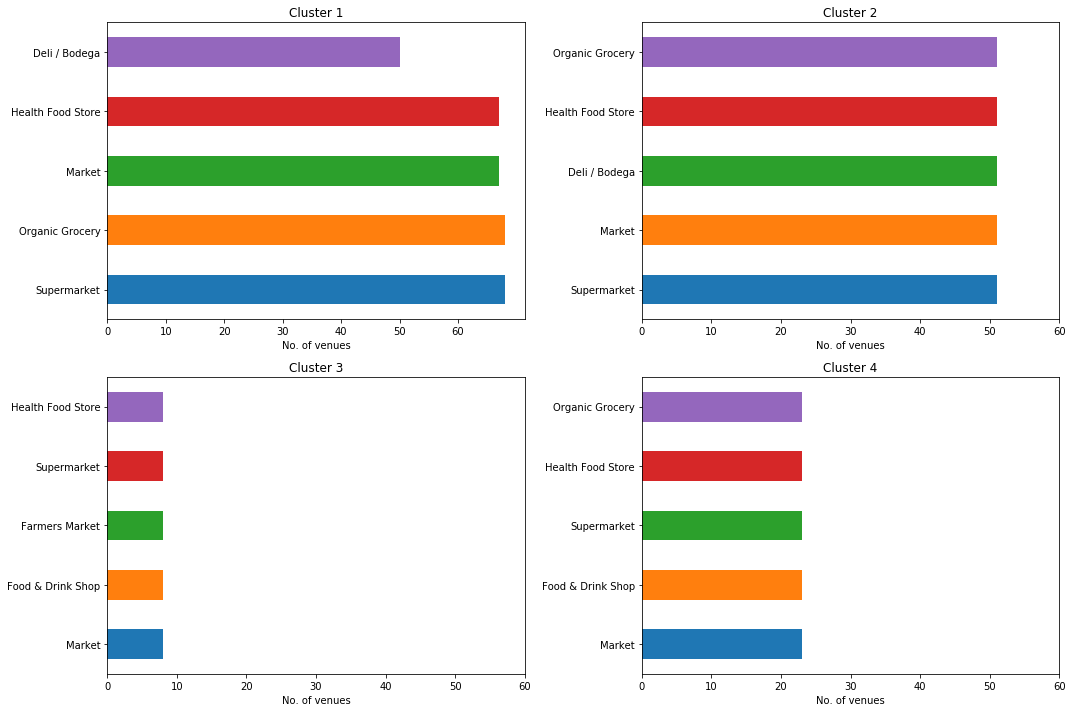

In [320]:

df_list = [venues1 ,venues2, venues3, venues4]
fig, axes = plt.subplots(2, 2)

count = 0
for r in range(2):
    for c in range(2):
        df_list[count].value_counts().head().plot.barh(ax = axes[r,c], width=0.5, figsize=(15,10))
        axes[r,c].set_title('Cluster {}'.format(count+1))
        plt.sca(axes[r, c])
        plt.xticks(np.arange(0, 70, 10))
        plt.xlabel('No. of venues')
        count += 1

fig.tight_layout()

The neighborhoods in cluster 3 have the least number of food related venues. This could make it an attractive area to open our supermarket as it is less competitive. However, there is probably a reason for the little amount of venues in this cluster. Cluster 1 and 2 have the most food related venues, and we therefore think there is too much compeitition. Especially in cluster 2, as there is mostly organic markets there. Therefore we choose to locate the store in cluster 4 which has (1) the least competition in terms of total venues, but (2) interest in organic markets and healthy foods (given the current venues). 

## 7. Conclusion 
The pupose of this project is to analyze the neighborhoods of NYC and create a clustering model to suggest the best location for a packaging free circular grocery shop. The neighborhoods data was obtained from an online source and the Foursquare API was used to find the major venues in each neighborhood. We merged the three most popular boroughs, Manhattan, Brooklyn and Queens, and build a data science  model. We selected our targets related to food markets and organic grocery shopping in all neighborhoods in the respective boroughs and used this as input to create a clustering model. The best number of clusters was obtained using the silhouette score. Each cluster was examined to find the most venue categories present, that defines the characteristics for that particular cluster.

A few examples for the applications that the clusters can be used for have also been discussed. A map showing the clusters have been provided. Both these can be used by stakeholders to decide the location for grocery store. Our suggestion would be cluster 4, as it has (1) the least competition in terms of total venues, but (2) interest in organic markets and healthy foods (given the current venues). A major drawback of this project was that the Foursquare API returned only few venues in each neighborhood. As a future improvement, better data sources can be used to obtain more venues in each neighborhood. This way the neighborhoods that were filtered out can be included in the clustering analysis to create a better decision model.